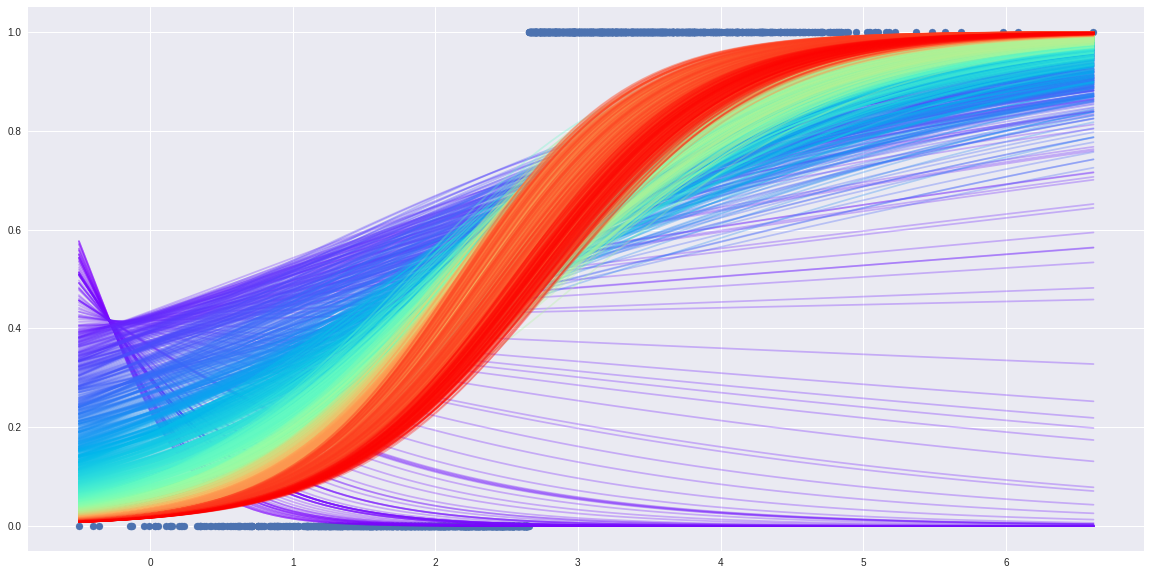

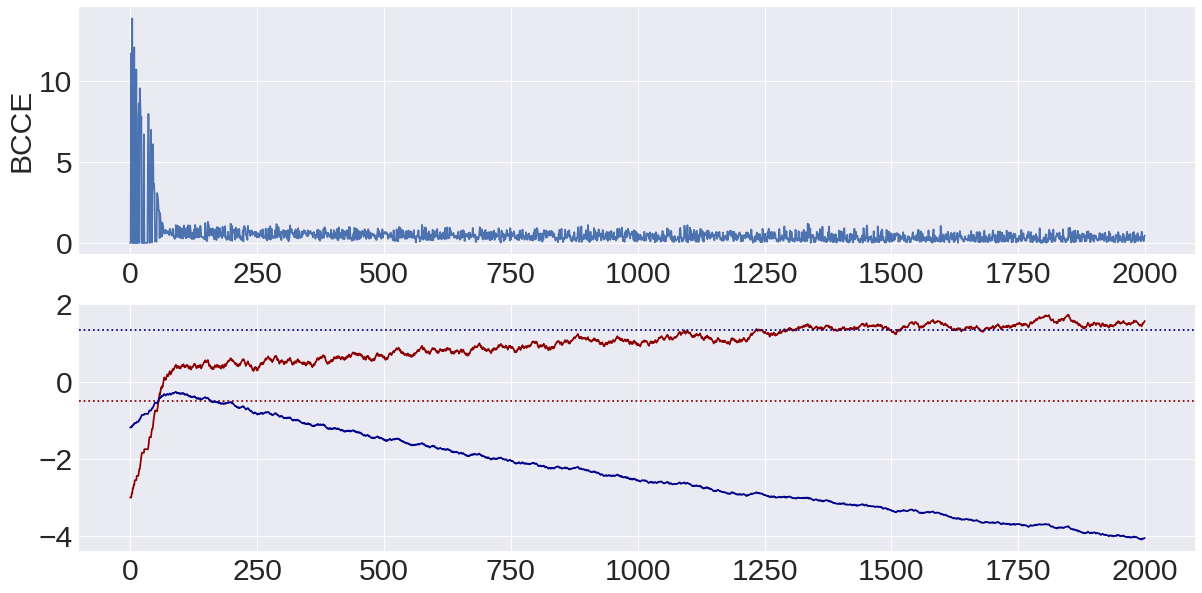

In [6]:
#logistic regression BCCE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')
N = 2000
lr = 0.03
t_w = np.random.uniform(-3,3,(1,))
t_b = np.random.uniform(-3,3,(1,))

w = np.random.uniform(-3,3,(1,))
b = np.random.uniform(-3,3,(1,))

db = -t_b/t_w

x_data = np.random.normal(db,1,size=(N,))
y_data = x_data * t_w + t_b
y_data = (x_data>db).astype(np.int)

fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(x_data,y_data)
J_track = list()
w_track,b_track = list(),list()

x_range = np.linspace(x_data.min(),x_data.max(),100)
cmap = cm.get_cmap('rainbow',lut = N)

for data_idx,(x,y) in enumerate(zip(x_data,y_data)):
    w_track.append(w)
    b_track.append(b)

    y_range = w* x_range+b
    y_range = 1/(1+np.exp(-y_range))

    ax.plot(x_range,y_range,color=cmap(data_idx),alpha=0.3)

    z = x*w+b
    pred = 1/(1+np.exp(-z))
    J = -(y*np.log(pred)+(1-y)*np.log(1-pred))
    J_track.append(J)

    dJ_pred = (pred-y)/(pred*(1-pred))
    dpred_dz = pred*(1-pred)
    dz_dw = x
    dz_db = 1

    dJ_dz = dJ_pred*dpred_dz
    dJ_dw = dJ_dz*dz_dw
    dJ_db = dJ_dz*dz_db

    w = w-lr*dJ_dw
    b = b-lr*dJ_db

fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel("BCCE",fontsize=30)
axes[0].tick_params(labelsize=30)

axes[1].axhline(y=t_w,color='darkred',linestyle=':')
axes[1].plot(w_track,color='darkred')

axes[1].axhline(y=t_b,color='darkblue',linestyle=':')
axes[1].plot(b_track,color='darkblue')

axes[1].tick_params(labelsize=30)

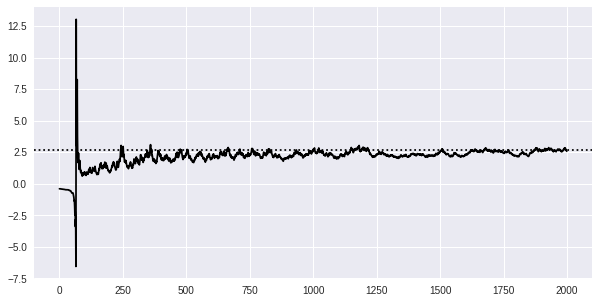

In [7]:
w_track = np.array(w_track)
b_track = np.array(b_track)

db_track = -b_track.flatten()/w_track.flatten()
db = -t_b/t_w

fig,ax = plt.subplots(figsize=(10,5))
ax.axhline(y=db,color='black',linestyle=':')
ax.plot(db_track,color='black')

In [ ]:
#해야함


# import numpy as np
# import matplotlib.pyplot as plt
# np.random.seed(1)
# plt.style.use('seaborn')

# N,n_feature = 1000,3
# lr = 0.03
# t_w = np.random.uniform(-1,1,(n_feature,1))
# t_b = np.random.uniform(-1,1,(1,))

# w = np.random.uniform(-1,1,(n_feature,1))
# b = np.random.uniform(-1,1,(1,1))

# x_data = np.random.randn(N,n_feature)
# y_data = x_data @ t_w+t_b
# y_data = 1/(1+np.exp(-y_data))
# y_data = (y_data>0.5).astype(np.int)

# J_track,acc_track = list(),list()
# n_correct = 0

# for data_idx,(x,y) in enumerate(zip(x_data,y_data)):
#     z = x@w +b
#     pred = 1/(1+np.exp(-z))

#     J = -(y*np.log(pred)+(1-y)*np.log(1-pred))
#     J_track.append(J.squeeze())

#     pred_ = (pred >0.5).astype(np.int).squeeze()
#     if pred_==y:
#         n_correct +=1
#     acc_track.append(n_correct/(data_idx+1))

#     dJ_dpred = (pred-y)/(pred*(1-pred))
#     dpred_dz = pred*(1-pred)
#     dz_dw = x.reshape(1,-1)
#     dz_db = 1

#     dJ_dz = dJ_dpred * dpred_dz
#     dJ_dw = dJ_dz * dz_dw
#     dJ_db = dJ_dz * dz_db

#     w = w - lr*dJ_dw.T
#     b = b - lr*dJ_db

# fig,axes =plt.subplots(2,1,figsize=(20,10))
# axes[0].plot(J_track)
# axes[1].plot(acc_track)

# axes[0].set_ylabel('BCCE',fontsize=30)
# axes[0].tick_params(labelsize=20)


# axes[1].set_ylabel('Accumulated Accuracy',fontsize=30)
# axes[1].tick_params(labelsize=20)